<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#ref0">Pandas is an API</a></li>
<li><a href="https://#ref1">REST APIs Basics  </a></li>
<li><a href="https://#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [2]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 7.8 MB/s eta 0:00:00


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [4]:
dict_= {'a':[11,21,31],'b':[12,22,32]}


When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [5]:
df= pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [6]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [7]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [8]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)
# bitcoin_data

In [9]:
type(bitcoin_data )

dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [33]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1656453668936, 20398.530481386562],
 [1656457244446, 20328.49713277272],
 [1656461005497, 20270.548294340697],
 [1656464470356, 20295.681206000467],
 [1656468110904, 20374.983538760513]]

Finally lets turn this data into a Pandas DataFrame.


In [35]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])
data

,TimeStamp,Price
0,1656453668936,20398.530481
1,1656457244446,20328.497133
2,1656461005497,20270.548294
3,1656464470356,20295.681206
4,1656468110904,20374.983539
...,...,...
716,1659031250644,24004.535417
717,1659034878422,23814.403629
718,1659038445947,23797.519505
719,1659042190681,24096.392735


Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [39]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))
data


,TimeStamp,Price,date
0,1656453668936,20398.530481,2022-06-28
1,1656457244446,20328.497133,2022-06-28
2,1656461005497,20270.548294,2022-06-29
3,1656464470356,20295.681206,2022-06-29
4,1656468110904,20374.983539,2022-06-29
...,...,...,...
716,1659031250644,24004.535417,2022-07-28
717,1659034878422,23814.403629,2022-07-28
718,1659038445947,23797.519505,2022-07-28
719,1659042190681,24096.392735,2022-07-28


Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [40]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data

date         Price                                          
                         min           max         first          last
0   2022-06-28  20328.497133  20398.530481  20398.530481  20328.497133
1   2022-06-29  19958.857850  20374.983539  20270.548294  20223.261440
2   2022-06-30  18817.428798  20122.427844  20122.427844  18927.657324
3   2022-07-01  19114.953339  20429.178979  19627.969395  19371.184517
4   2022-07-02  19109.367283  19378.141016  19314.610293  19345.062017
5   2022-07-03  19015.704790  19482.648523  19261.547477  19299.174566
6   2022-07-04  19106.023616  20106.976603  19310.233219  20106.976603
7   2022-07-05  19420.079496  20493.562679  20249.978219  20375.983039
8   2022-07-06  19885.772103  20517.772667  20188.126382  20517.772667
9   2022-07-07  20347.039132  21790.773519  20566.687224  21607.390054
10  2022-07-08  21293.230607  22109.673639  21660.596837  21766.456667
11  2022-07-09  21511.656552  21851.623147  21767.370196  21634.778796
12  2022-07-10  20828.123959  21600.467473  21600.467473  20872.106768
13  2022-07-11  20062.918477  20867.403980  20867.403980  20062.918477
14  2022-07-12  19415.440969  20027.259080  19961.625901  19415.440969
15  2022-07-13  19113.688679  19912.101239  19350.737350  19844.246945
16  2022-07-14  19748.348514  20697.657307  20204.492326  20499.224347
17  2022-07-15  20435.357941  21135.784033  20594.754617  20889.314292
18  2022-07-16  20522.749340  21399.149591  20794.811981  21227.184606
19  2022-07-17  20935.721864  21509.626029  21193.083343  20995.891185
20  2022-07-18  20802.939872  22343.508744  20802.939872  21784.494533
21  2022-07-19  21766.862634  23654.858145  22395.365383  23461.983919
22  2022-07-20  22993.315870  24160.260513  23366.907698  23364.053665
23  2022-07-21  22524.740214  23274.063474  23216.590217  23016.031815
24  2022-07-22  22648.696277  23665.847268  23155.207555  22737.283714
25  2022-07-23  22067.867506  22913.847008  22696.902754  22511.787846
26  2022-07-24  22338.578694  22860.154563  22506.199574  22860.154563
27  2022-07-25  21661.450773  22606.217112  22606.217112  21661.450773
28  2022-07-26  20783.387306  21401.478074  21401.478074  21106.480350
29  2022-07-27  21079.370755  22855.894271  21235.612316  22855.894271
30  2022-07-28  22777.251048  24096.392735  22908.884260  23901.219563

Finally we are now ready to use plotly to create our Candlestick Chart.


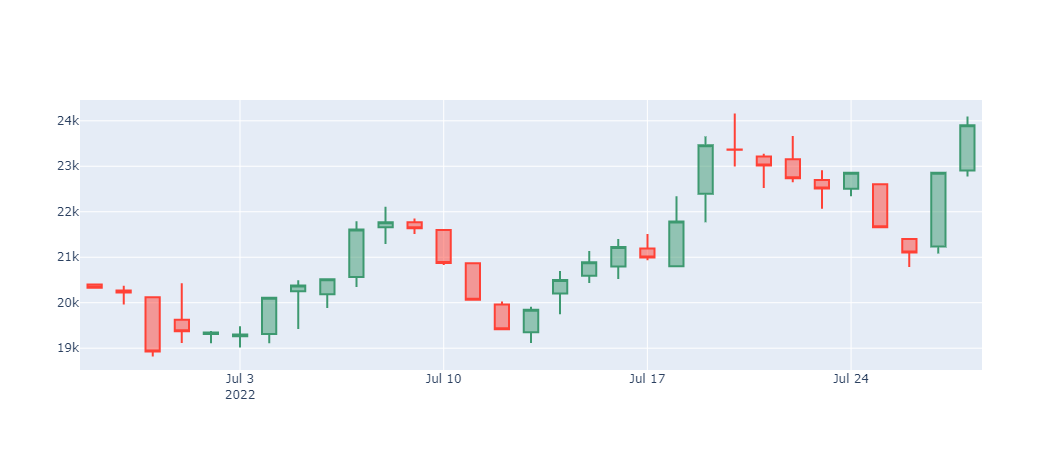

In [49]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-11-23        | 3.0     | Azim Hirjani  | New API                            |
| 2020-09-09        | 2.1     | Malika Singla | Spell Check                        |
| 2020-08-26        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
